# Problem Statement & Data Description

   This file describes the contents of the heart-disease directory.

   This directory contains 1 database concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   following location:

     1. Cleveland Clinic Foundation (cleveland.data)

   **Digital Citizens**
   
   **August 09, 2019**


1. **Title**: Heart Disease Databases

2. **Source Information**:
   (a) Creators: 
       1. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:
             Robert Detrano, M.D., Ph.D.

3. **Relevant Information**:
     This database contains 76 attributes, but all published experiments
     refer to using a subset of 14 of them.  In particular, the Cleveland
     database is the only one that has been used by ML researchers to 
     this date. The "goal" field refers to the presence of heart disease
     in the patient.  It is integer valued from 0 (no presence) to 4.
     Experiments with the Cleveland database have concentrated on simply
     attempting to distinguish presence (values 1,2,3,4) from absence (value
     0).  
   
     The names and social security numbers of the patients were recently 
     removed from the database, replaced with dummy values.

     One file has been "processed", that one containing the Cleveland 
     database.
4. **Number of Instances:** 
        Database:    # of instances:
          Cleveland: 303

5. **Number of Attributes: 76 (including the predicted attribute)**

6. **Attribute Information:**
   
7. **Features Description**
The table below, summarizes the features information:

| Feature  | Detail           | 
| ------------- |:-------------:| 
| Age      | Age in years | 
| Sex      | 1 for male; 0 for female    |  
| Chest pain type | Value1: typical angina. Value2: atypical angina. Value3: non-anginal pain. Vlaue4: asymptomatic|
| Resting blood pressure| In mm hg on admission to the hospital| 
| Serum cholesterol|In mg/dI|  
| Fasting blood sugar > 120 mg/dI|1 for true; 0 for false|  
| Resting electrocardiographic results|Value0: normal. Value1: having ST-T wave abnormality (T-wave inversions and/or ST elevation or depression of > 0.05 mV). Value2: showing probable or definite left ventricular hypertrophy by Estes’s criteria| 
|Maximum heart rate achieved| centered      |  
|Exercise-induced angina|1 for yes; 0 for no|  
|oldpeak: ST depression induced by exercise relative to rest|In mm Hg on admission to the hospital| 
|Number of major vessels| (0-4) colored by fluoroscopy|  
|The slope of the peak exercise ST segment|Value1: upsloping. Value2: flat. Value3: downsloping|  
|Thallium heart scan|3 for normal; 6 for fixed defect; 7 for reversible defect| 
|Diagnosis heart disease (angiographic disease)|Value0: no disease. Value1: heart disease|   


7. **Missing Attribute Values**: Distinguished with value -9.0. (Have to be treated)

8. **Class Distribution**:
        Database:      0   1   2   3   4 Total
          Cleveland: 164  55  36  35  13   303


# Data Preprocessing

In [101]:
# Importing the modules
import numpy as np # Linear Algebra
import pandas as pd # Dealing with DataFrames

import seaborn as sns # Advanced plotting 

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn import model_selection

from sklearn.model_selection import KFold

import itertools

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn import tree

from IPython.display import Image

## Defining Functions for future use

In [264]:
# function for confusion matrix building
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# function for confusion matrix building
def visualize_tree(tr, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        tree.export_graphviz(tr, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    

    
# To give more meaning to integer labes 0,1,...

attribute_name = ''

def convert_integral_labels_into_meaningful_labels(label):
    if (attribute_name == 'sex') :
        if (label == 1):
            return "male"
        else:
            return "female"
    elif (attribute_name == 'cp_type') :
        if (label == 1):
            return "typical-angina"
        elif (label == 2):
            return "atypical-angina"
        elif (label == 3):
            return "non-anginal_pain"
        else:
            return "asymptomatic"
    elif (attribute_name == 'fasting_blood_sugar') :
        if (label == 1):
            return ">120-mg/dl"
        else:
            return "<=120-mg/dl"
    elif (attribute_name == 'resting_ecg') :
        if (label == 0):
            return "normal"
        else:
            return "abnormal "
    elif (attribute_name == 'exercise_induced_angina') :
        if (label == 1):
            
            return "yes"
        else:
            return "false"
    elif (attribute_name == 'slope') :
        if (label == 1):
            return "unsloping"
        elif (label == 2):
            return "flat"
        else:
            return "downsloping"
    elif (attribute_name == "thalassemia"):
        if (label == 3):
            return "normal"
        elif (label == 6):
            return "fixed-defect"
        else:
            return "reversible-defect"
    else:
        return label


def lcm_of_two_numbers(x, y):
    """This function takes two integers and returns the Lowest Common Multiple."""
#     choose the greater number
    if x > y :
        greater = x
    else:
        greater = y
    
    while(True):
        if((greater %x == 0) & (greater %y == 0)):
            lcm = greater
            break
        else:
            greater+= 1
    return lcm

In [133]:
# Loading the dataset
dset_heart = pd.read_csv('./input/heart_cleveland.csv')

In [134]:
# Assigning meaningful names to the attributes
dset_heart.columns = ['age','sex','cp_type','resting_bp','serum_cholestoral','fasting_blood_sugar',\
        'resting_ecg','maximum_HR_achieved','exercise_induced_angina',\
        'oldpeak','slope','major_vessels','thalassemia','target_diagnosis']

In [135]:
# Heading towards data
dset_heart.head()

,age,sex,cp_type,resting_bp,serum_cholestoral,fasting_blood_sugar,resting_ecg,maximum_HR_achieved,exercise_induced_angina,oldpeak,slope,major_vessels,thalassemia,target_diagnosis
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [136]:
#  How the data looks like?
dset_heart.shape

(303, 14)

In [137]:
# Identifying null values as  Missing Attribute Values are distinguished with value -9.0 in the dataset
for column_name in dset_heart.columns:
    dset_heart[coloun_name].replace(-9.0, np.nan)

In [138]:
# Are there any missing values?
dset_heart.isnull().sum()

age                        0
sex                        0
cp_type                    0
resting_bp                 0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg                0
maximum_HR_achieved        0
exercise_induced_angina    0
oldpeak                    0
slope                      0
major_vessels              0
thalassemia                0
target_diagnosis           0
dtype: int64

In [139]:
# info of each Feature
dset_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
cp_type                    303 non-null int64
resting_bp                 303 non-null int64
serum_cholestoral          303 non-null int64
fasting_blood_sugar        303 non-null int64
resting_ecg                303 non-null int64
maximum_HR_achieved        303 non-null int64
exercise_induced_angina    303 non-null int64
oldpeak                    303 non-null float64
slope                      303 non-null int64
major_vessels              303 non-null int64
thalassemia                303 non-null int64
target_diagnosis           303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [140]:
# Segregating Categorical to convert them into 'object' type
categorical_features = "sex, cp_type, fasting_blood_sugar, resting_ecg, exercise_induced_angina, slope, major_vessels, thalassemia".split(", ")
continuous_num = "age, resting_bp, serum_cholestoral, maximum_HR_achieved, oldpeak, thalassemia".split(", ")

In [141]:
# Changing inegral type features based on categories to 'object' type
# Converting each value of such feature to 'object' type

for feature_name in categorical_features:
    attribute_name = feature_name
    dset_heart[feature_name] = dset_heart[feature_name].astype(dtype = 'object', errors = 'raise')
    dset_heart[feature_name] = dset_heart[feature_name].apply(convert_integral_labels_into_meaningful_labels)

In [142]:
# does info about each feature cheats us again?
dset_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null object
cp_type                    303 non-null object
resting_bp                 303 non-null int64
serum_cholestoral          303 non-null int64
fasting_blood_sugar        303 non-null object
resting_ecg                303 non-null object
maximum_HR_achieved        303 non-null int64
exercise_induced_angina    303 non-null object
oldpeak                    303 non-null float64
slope                      303 non-null object
major_vessels              303 non-null int64
thalassemia                303 non-null object
target_diagnosis           303 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 24.9+ KB


In [145]:
#  Checking if the values are also converted to str
dset_heart.sample(5)

,age,sex,cp_type,resting_bp,serum_cholestoral,fasting_blood_sugar,resting_ecg,maximum_HR_achieved,exercise_induced_angina,oldpeak,slope,major_vessels,thalassemia,target_diagnosis
12,49,male,typical-angina,130,266,<=120-mg/dl,abnormal,171,false,0.6,flat,0,reversible-defect,1
220,63,female,asymptomatic,150,407,<=120-mg/dl,normal,154,false,4.0,unsloping,3,normal,0
214,56,male,asymptomatic,125,249,>120-mg/dl,normal,144,yes,1.2,unsloping,1,reversible-defect,0
119,46,female,asymptomatic,138,243,<=120-mg/dl,normal,152,yes,0.0,unsloping,0,reversible-defect,1
41,48,male,typical-angina,130,245,<=120-mg/dl,normal,180,false,0.2,unsloping,0,reversible-defect,1


# Data Exploration

In [158]:
# Describing the data
dset_heart.describe()

,age,resting_bp,serum_cholestoral,maximum_HR_achieved,oldpeak,major_vessels,target_diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


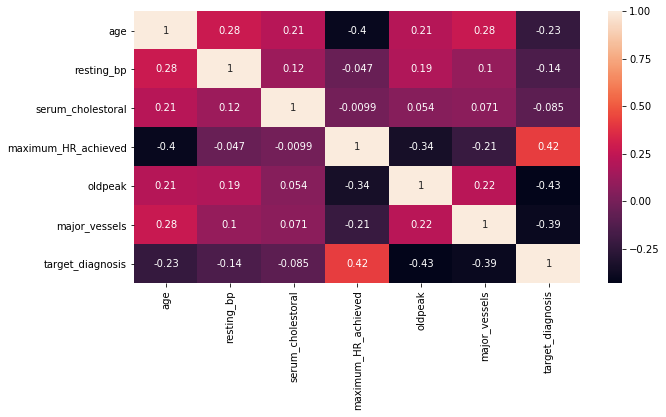

In [165]:
# Checking the correlation
plt.figure(figsize=(10,5))
sns.heatmap(data = dset_heart.corr(), annot = True, )

## Inference
* maximum_HR_achieved is inversely (medium strong) related with age. **That is, the older the person gets, the lower the maximum heart rate is achieved**
* The more is ST depression or oldpeak, the more is the chance that the person is not suffering from heart disease

male      207
female     96
Name: sex, dtype: int64



sex     target_diagnosis
female  1                    72
        0                    24
male    0                   114
        1                    93
Name: target_diagnosis, dtype: int64




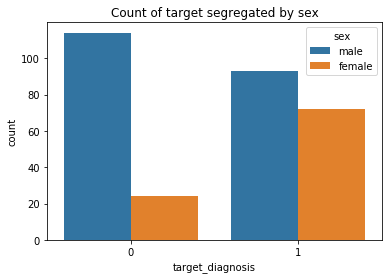

In [246]:
print(dset_heart['sex'].value_counts(), end = "\n\n\n\n")

print(dset_heart.groupby('sex')['target_diagnosis'].value_counts(), end = "\n\n\n")

sns.countplot(x = 'target_diagnosis', hue = 'sex', data = dset_heart)
plt.title("Count of target segregated by sex")
plt.show()

In [295]:
# Manual Calculations for the making the base equal for male and female because it'll be wrong to compare them with differnt base
lcm_ = lcm_of_two_numbers(96, 207)

base_multiplier_for_females = lcm_/96
base_multiplier_for_males = lcm_/207

females_with_target_1_after_base_change = 0.75*lcm_
males_with_target_1_after_base_change = (114/207)* lcm_

females_with_target_1_after_base_change/males_with_target_1_after_base_change

1.361842105263158

## Inference
* **36% more females when compared to men are more likey to suffer from heart disease**
* 75% of the females are likely to suffer from heart disease
* less than 45% of the men are likely to suffer from heart disease

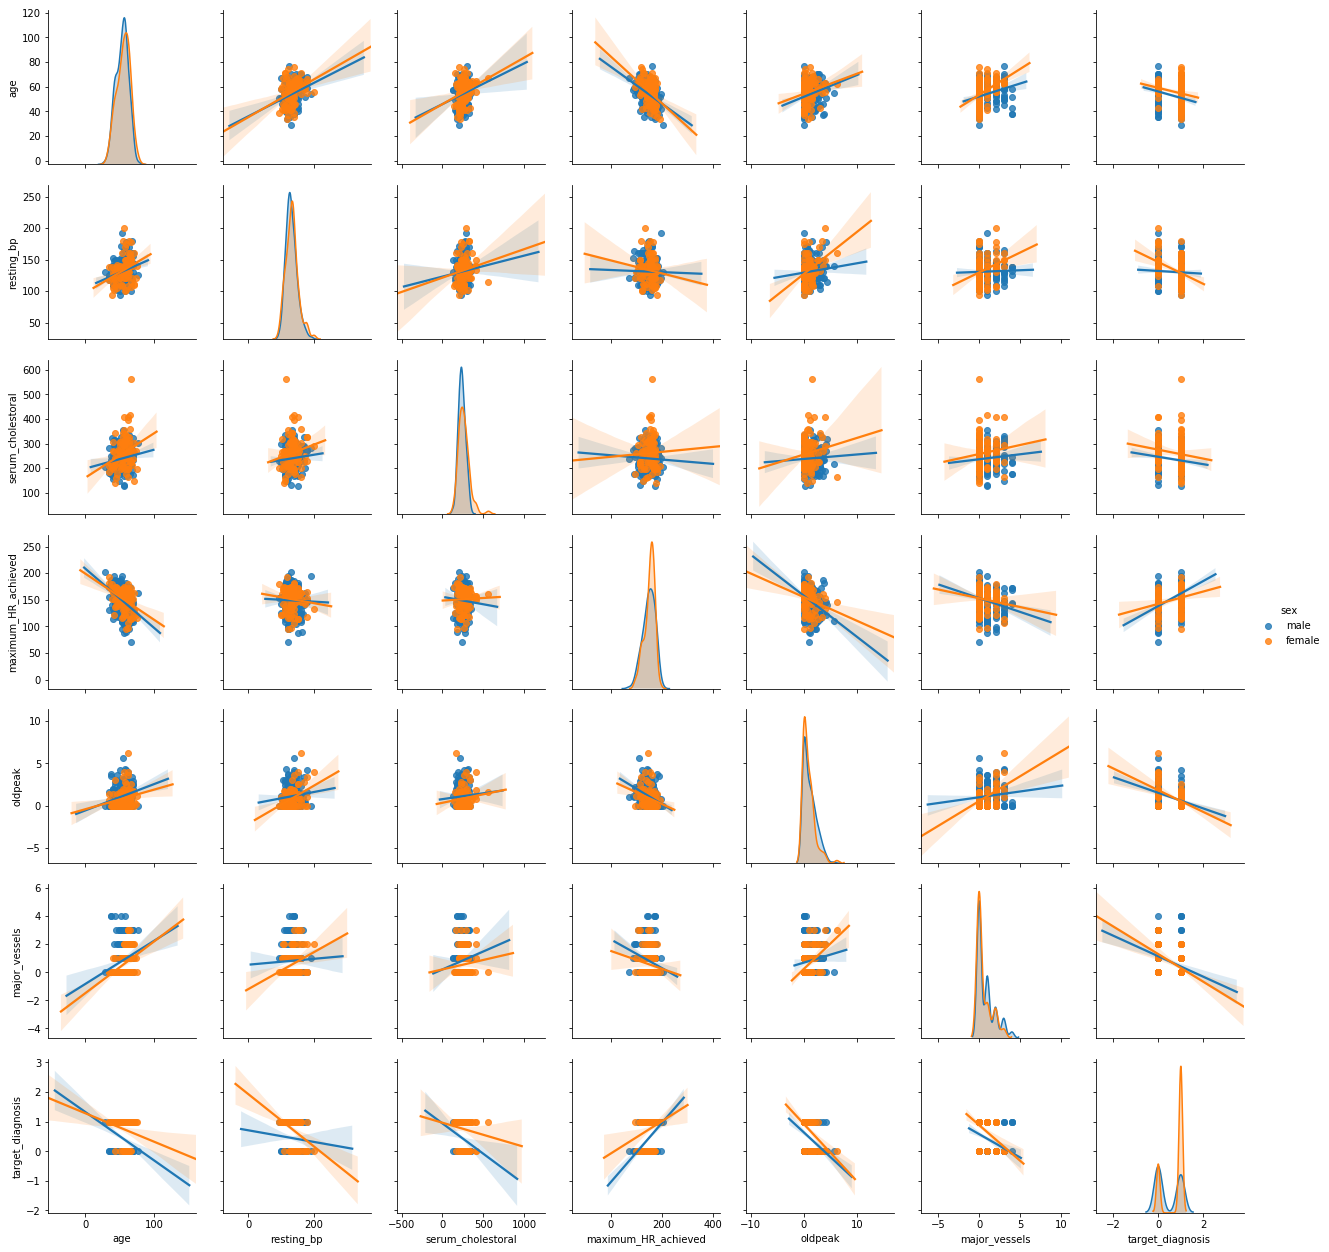

In [193]:
sns.pairplot(data = dset_heart, hue = 'sex', diag_kind = 'kde', kind = 'reg')

### Inferences from the above pairplot
* There is a more likely chance of a Female suffering from  heart disease than a Male
* 